Strongly inspirated by https://towardsdatascience.com/a-deep-dive-into-imbalanced-data-over-sampling-f1167ed74b5

dataset -> https://www.kaggle.com/mlg-ulb/creditcardfraud/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE

import matplotlib.patches as mpatches

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

# plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Analysis

In [3]:
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null 

In [4]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


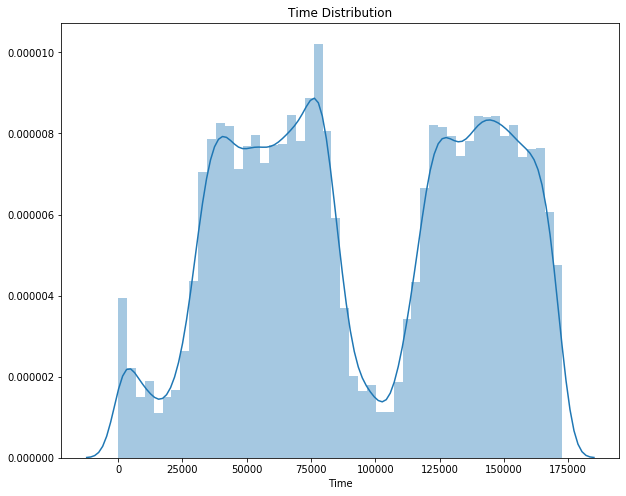

In [5]:
plt.figure(figsize=(10,8))
plt.title('Time Distribution')
sns.distplot(df.Time)

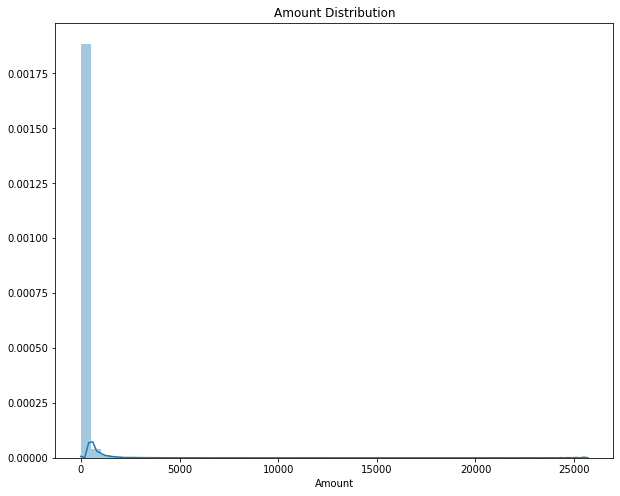

In [6]:
plt.figure(figsize=(10,8))
plt.title('Amount Distribution')
sns.distplot(df.Amount)

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

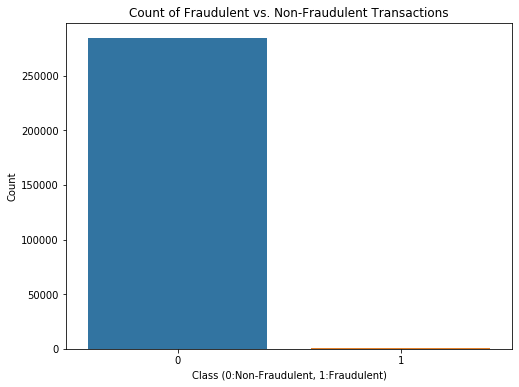

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(df.Class)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [8]:
print("Percentage of Fraudulent records:", df[df['Class']==1]['Class'].count()/df.shape[0]*100)
print("Count Fraudulent records:", df[df['Class']==1]['Class'].count())
print("Percentage of Non-Fraudulent records:", df[df['Class']==0]['Class'].count()/df.shape[0]*100)
print("Count Non-Fraudulent records:", df[df['Class']==0]['Class'].count())


Percentage of Fraudulent records: 0.1727485630620034
Count Fraudulent records: 492
Percentage of Non-Fraudulent records: 99.82725143693798
Count Non-Fraudulent records: 284315


Text(0.5, 1, 'Heatmap of Correlation')

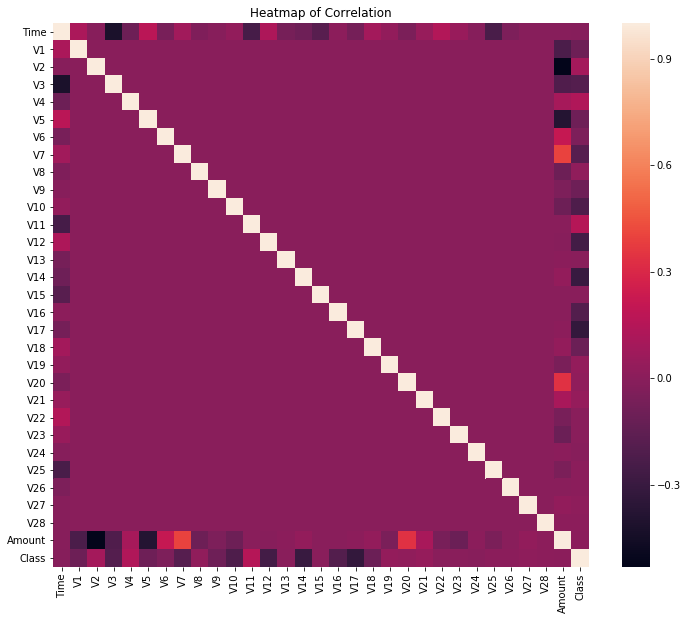

In [9]:
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=df.corr())
plt.title('Heatmap of Correlation')

## Data Preparation

In [10]:
scalerTime = StandardScaler()
scalerAmount = StandardScaler()
#scaling time
df[['Time']] = scalerTime.fit_transform(df[['Time']])
df[['Amount']] = scalerAmount.fit_transform(df[['Amount']])

In [11]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265986,1.418,-0.050,1.140,-0.931,-0.037,0.271,-1.308,0.754,0.127,-0.240,...,0.364,0.992,-0.045,-0.097,-0.349,-0.151,-0.012,0.043,-0.182,0
62150,-0.940,1.269,-1.293,0.143,-1.499,-1.132,-0.038,-0.860,-0.036,-2.270,...,-0.084,-0.041,-0.094,-0.304,0.339,-0.181,0.025,0.022,0.101,0
88356,-0.689,1.109,-0.343,-1.013,0.371,1.937,3.816,-0.555,0.907,0.388,...,-0.071,-0.267,-0.219,1.027,0.870,-0.264,0.026,0.028,-0.038,0
53086,-1.032,-0.306,1.059,0.824,-0.329,0.656,0.026,0.620,0.134,-0.611,...,-0.284,-0.773,-0.164,-0.883,-0.026,0.126,0.240,0.077,-0.321,0
236764,1.140,2.162,-1.658,-0.903,-1.343,-1.229,0.017,-1.193,0.050,-0.912,...,-0.462,-0.747,0.315,0.729,-0.212,-0.380,0.005,-0.051,-0.154,0


### Random under-sampling

In [12]:
frauds = df[df['Class'] == 1]
frauds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-1.988,-2.312,1.952,-1.610,3.998,-0.522,-1.427,-2.537,1.392,-2.770,...,0.517,-0.035,-0.465,0.320,0.045,0.178,0.261,-0.143,-0.353,1
623,-1.987,-3.044,-3.157,1.088,2.289,1.360,-1.065,0.326,-0.068,-0.271,...,0.662,0.435,1.376,-0.294,0.280,-0.145,-0.253,0.036,1.762,1
4920,-1.903,-2.303,1.759,-0.360,2.330,-0.822,-0.076,0.562,-0.399,-0.238,...,-0.294,-0.932,0.173,-0.087,-0.156,-0.543,0.040,-0.153,0.606,1
6108,-1.849,-4.398,1.358,-2.593,2.680,-1.128,-1.707,-3.496,-0.249,-0.248,...,0.574,0.177,-0.436,-0.054,0.252,-0.657,-0.827,0.850,-0.117,1
6329,-1.838,1.234,3.020,-4.305,4.733,3.624,-1.358,1.713,-0.496,-1.283,...,-0.379,-0.704,-0.657,-1.633,1.489,0.567,-0.010,0.147,-0.349,1


In [13]:
frauds_count = df[df['Class']==1]['Class'].count()
selected = df[df['Class']==0].sample(frauds_count)
selected.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99337,-0.584,0.820,-1.074,0.932,0.292,-1.433,-0.026,-0.605,0.229,1.122,...,-0.088,-0.502,-0.075,0.390,-0.004,0.910,-0.080,0.033,0.400,0
143414,-0.200,1.395,-0.726,0.514,-0.737,-1.243,-0.672,-0.873,0.005,-0.286,...,-0.003,-0.235,0.026,-0.176,0.246,-0.331,0.006,0.019,-0.251,0
254972,1.310,-0.780,0.566,1.028,-0.741,-0.161,0.212,-0.112,0.441,0.410,...,0.325,0.948,-0.064,0.797,-0.775,0.382,-0.392,-0.105,-0.307,0
216626,0.963,-2.156,0.845,-0.211,-3.879,0.727,0.885,0.160,1.370,0.402,...,-0.342,-1.188,-0.089,-1.017,0.468,-0.724,0.176,-0.052,-0.124,0
235498,1.129,2.132,-1.126,-0.765,-1.057,-0.818,0.077,-1.183,0.146,0.004,...,0.343,0.941,0.111,0.367,-0.142,-0.117,-0.006,-0.054,-0.253,0


In [14]:
selected.reset_index(drop=True, inplace=True)
frauds.reset_index(drop=True, inplace=True)

In [15]:
selected.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.584,0.820,-1.074,0.932,0.292,-1.433,-0.026,-0.605,0.229,1.122,...,-0.088,-0.502,-0.075,0.390,-0.004,0.910,-0.080,0.033,0.400,0
1,-0.200,1.395,-0.726,0.514,-0.737,-1.243,-0.672,-0.873,0.005,-0.286,...,-0.003,-0.235,0.026,-0.176,0.246,-0.331,0.006,0.019,-0.251,0
2,1.310,-0.780,0.566,1.028,-0.741,-0.161,0.212,-0.112,0.441,0.410,...,0.325,0.948,-0.064,0.797,-0.775,0.382,-0.392,-0.105,-0.307,0
3,0.963,-2.156,0.845,-0.211,-3.879,0.727,0.885,0.160,1.370,0.402,...,-0.342,-1.188,-0.089,-1.017,0.468,-0.724,0.176,-0.052,-0.124,0
4,1.129,2.132,-1.126,-0.765,-1.057,-0.818,0.077,-1.183,0.146,0.004,...,0.343,0.941,0.111,0.367,-0.142,-0.117,-0.006,-0.054,-0.253,0


In [16]:
subsample = pd.concat([selected, frauds])
print(subsample.shape)
subsample.head()
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.184,-3.818,2.551,-4.759,1.637,-1.168,-1.678,-3.145,1.245,-1.693,...,0.838,0.762,-0.418,-0.470,-0.226,0.586,-0.348,0.088,-0.310,1
1,-0.020,-13.087,7.352,-18.257,10.649,-11.731,-3.659,-14.874,8.810,-5.418,...,2.761,-0.266,-0.413,0.520,-0.744,-0.168,-2.498,-0.711,-0.232,1
2,-1.039,-1.477,2.122,-1.229,1.202,-0.343,-1.318,-1.528,-0.621,-1.213,...,1.186,-0.040,-0.239,0.110,0.045,-0.569,0.481,-0.048,-0.349,1
3,-1.131,-3.601,4.519,-6.341,6.215,-5.830,-2.478,-9.938,2.830,-5.659,...,2.264,0.621,-0.094,0.537,0.398,0.008,2.054,0.836,-0.338,1
4,-0.339,-4.312,1.886,-2.339,-0.475,-1.185,-2.112,-2.123,0.273,0.290,...,0.551,-0.068,-1.115,0.269,-0.021,-0.963,-0.919,0.001,-0.113,1
5,-0.560,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,...,27.203,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,-0.349,1
6,-1.270,1.081,0.416,0.863,2.521,-0.005,0.563,-0.123,0.223,-0.674,...,-0.159,-0.305,0.054,0.012,0.375,-0.106,0.021,0.011,-0.347,1
7,-1.027,-1.309,1.786,-1.371,1.214,-0.337,-1.390,-1.709,0.668,-1.700,...,0.534,-0.022,-0.300,-0.226,0.364,-0.475,0.571,0.293,-0.349,1
8,-1.091,-1.110,0.811,-1.138,0.935,-2.330,-0.116,-1.622,0.458,-0.912,...,0.642,0.842,0.177,0.081,-0.259,0.708,0.419,0.081,0.463,1
9,-0.952,1.186,-0.570,0.127,-0.301,-0.930,-0.784,-0.441,-0.096,-0.649,...,0.010,-0.075,-0.003,0.328,0.332,-0.299,0.025,0.050,-0.023,0


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

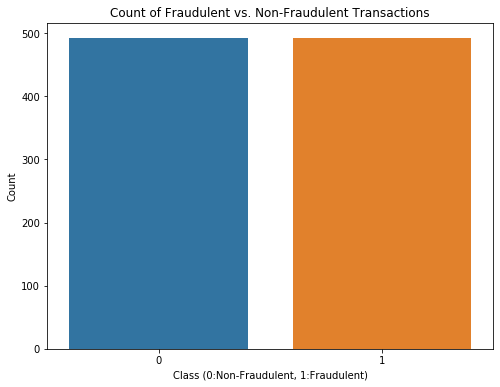

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(subsample.Class)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1, 'Heatmap of Correlation')

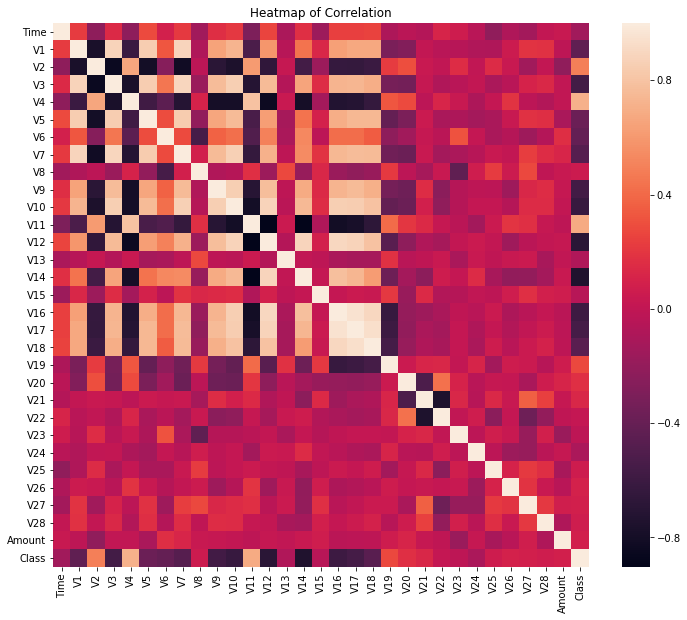

In [18]:
corr = subsample.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [19]:
corr[corr['Class']<-0.5 ]['Class']

V3    -0.565
V9    -0.571
V10   -0.626
V12   -0.687
V14   -0.746
V16   -0.597
V17   -0.560
Name: Class, dtype: float64

In [20]:
corr[corr['Class']>0.5 ]['Class']

V4       0.715
V11      0.685
Class    1.000
Name: Class, dtype: float64

In [21]:
# remove strongly correlated attributes
subsample.drop(['V3', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V4', 'V11'], axis=1, inplace=True)

## Dimensionality Reduction

In [22]:
X = subsample.drop('Class', axis=1)
y = subsample['Class']

In [23]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

In [24]:
target = df['Class']
new_df = df.drop(['Class'], axis=1)

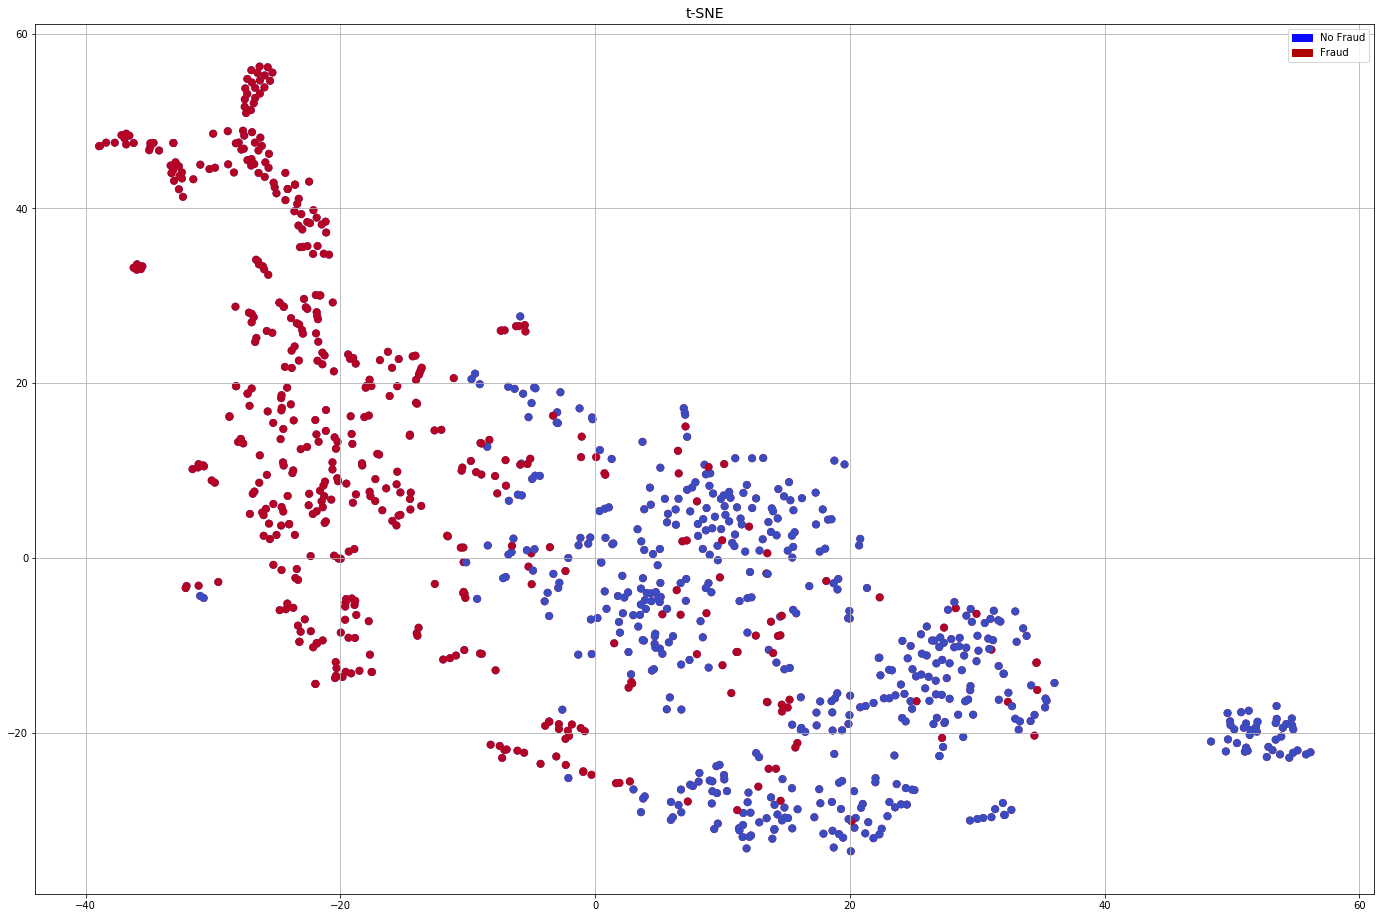

In [26]:
f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

## Classification

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [28]:
print("Count Fraudulent records in train:", y_train[y_train==1].count())
print("Count Fraudulent records in test:", y_test[y_test==1].count())
print("Percentage Fraudulent records in train:", y_train[y_train==1].count()/y_train.shape[0]*100)
print("Percentage Fraudulent records in test:", y_test[y_test==1].count()/y_test.shape[0]*100)

Count Fraudulent records in train: 344
Count Fraudulent records in test: 148
Percentage Fraudulent records in train: 50.0
Percentage Fraudulent records in test: 50.0


In [29]:
models_under = []

models_under.append(('LR', LogisticRegression()))
models_under.append(('LDA', LinearDiscriminantAnalysis()))
models_under.append(('KNN', KNeighborsClassifier()))
models_under.append(('DTree', DecisionTreeClassifier()))
models_under.append(('SVM', SVC()))
models_under.append(('XGB', XGBClassifier()))
models_under.append(('RF', RandomForestClassifier()))

#testing models

results_under = []
names_under = []

for name, model in models_under:
    kfold = KFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')
    results_under.append(cv_results)
    names_under.append(name)

In [30]:
for i, cv_res in enumerate(results_under):
    msg = '%s: %f (%f)' % (names_under[i], cv_res.mean(), cv_res.std())
    print(msg)

LR: 0.939285 (0.009863)
LDA: 0.926795 (0.015192)
KNN: 0.950141 (0.008317)
DTree: 0.843301 (0.015821)
SVM: 0.943349 (0.005640)
XGB: 0.954235 (0.007472)
RF: 0.960331 (0.006617)


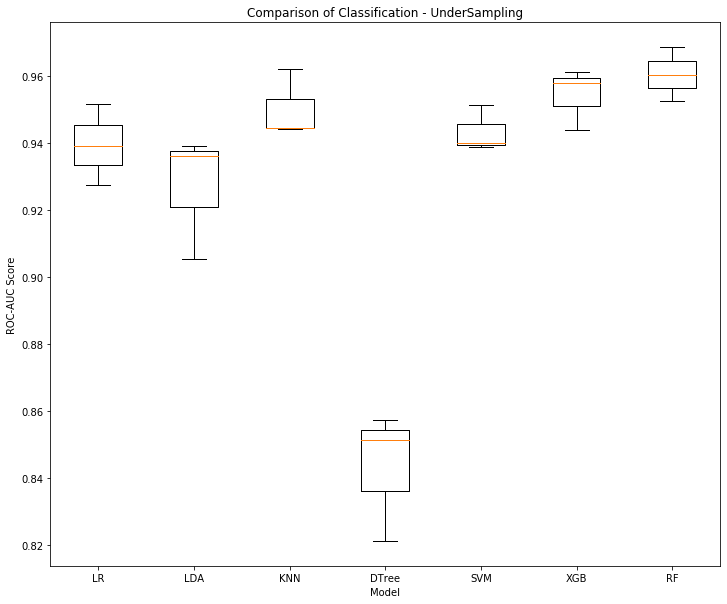

In [50]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification - UnderSampling')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results_under)
ax = fig.add_subplot(111)
ax.set_xticklabels(names_under)
plt.show()

# Test imblearn
#### (no Data Preparation)

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from collections import Counter

Using TensorFlow backend.


## SMOTE

In [33]:
X = df.drop('Class', axis=1)
y = df['Class']

In [34]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled_SMOTE).items()))

[(0, 284315), (1, 284315)]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled_SMOTE, y_resampled_SMOTE, test_size=0.3)

In [36]:
models_SMOTE = []

models_SMOTE.append(('LR', LogisticRegression()))
models_SMOTE.append(('LDA', LinearDiscriminantAnalysis()))
models_SMOTE.append(('KNN', KNeighborsClassifier()))
models_SMOTE.append(('DTree', DecisionTreeClassifier()))
models_SMOTE.append(('SVM', SVC()))
models_SMOTE.append(('XGB', XGBClassifier()))
models_SMOTE.append(('RF', RandomForestClassifier()))

#testing models

results_SMOTE = []
names_SMOTE = []

for name, model in models_SMOTE:
    kfold = KFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')
    results_SMOTE.append(cv_results)
    names_SMOTE.append(name)

In [38]:
for i, cv_res in enumerate(results_SMOTE):
    msg = '%s: %f (%f)' % (names_SMOTE[i], cv_res.mean(), cv_res.std())
    print(msg)

LR: 0.989258 (0.000080)
LDA: 0.977018 (0.000357)
KNN: 0.999465 (0.000017)
DTree: 0.997100 (0.000175)
SVM: 0.997092 (0.000053)
XGB: 0.998527 (0.000054)
RF: 0.999993 (0.000005)


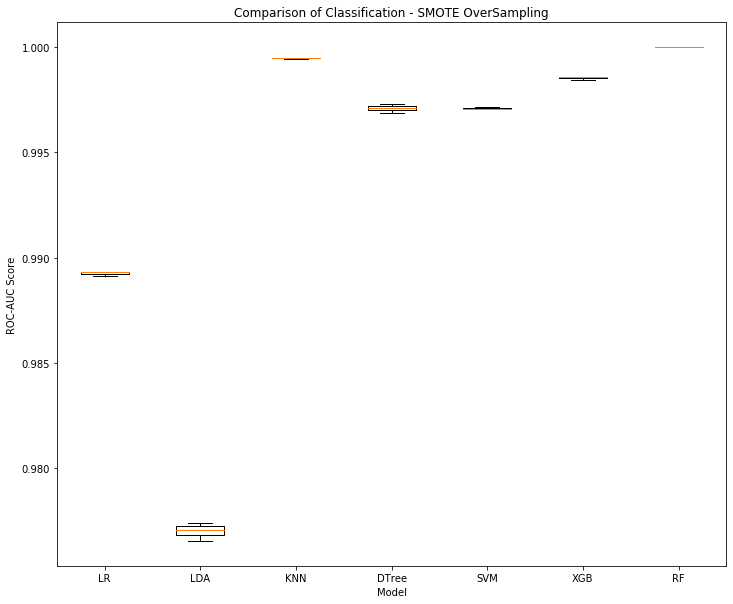

In [49]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification - SMOTE OverSampling')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results_SMOTE)
ax = fig.add_subplot(111)
ax.set_xticklabels(names_SMOTE)
plt.show()

## ADASYN

In [40]:
# applying ADASYN
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled_ADASYN).items()))
x_train, x_test, y_train, y_test = train_test_split(X_resampled_ADASYN, y_resampled_ADASYN, test_size=0.3)

[(0, 284315), (1, 284306)]


In [51]:
models_adasyn = []

models_adasyn.append(('LR', LogisticRegression()))
models_adasyn.append(('LDA', LinearDiscriminantAnalysis()))
models_adasyn.append(('KNN', KNeighborsClassifier()))
models_adasyn.append(('DTree', DecisionTreeClassifier()))
models_adasyn.append(('SVM', SVC()))
models_adasyn.append(('XGB', XGBClassifier()))
models_adasyn.append(('RF', RandomForestClassifier()))

#testing models

results_adasyn = []
names_adasyn = []

for name, model in models_adasyn:
    kfold = KFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')
    results_adasyn.append(cv_results)
    names_adasyn.append(name)

In [52]:
for i, cv_res in enumerate(results_adasyn):
    msg = '%s: %f (%f)' % (names_SMOTE[i], cv_res.mean(), cv_res.std())
    print(msg)

LR: 0.959872 (0.000419)
LDA: 0.931737 (0.000414)
KNN: 0.999437 (0.000082)
DTree: 0.997724 (0.000133)
SVM: 0.998399 (0.000040)
XGB: 0.995015 (0.000371)
RF: 0.999994 (0.000004)


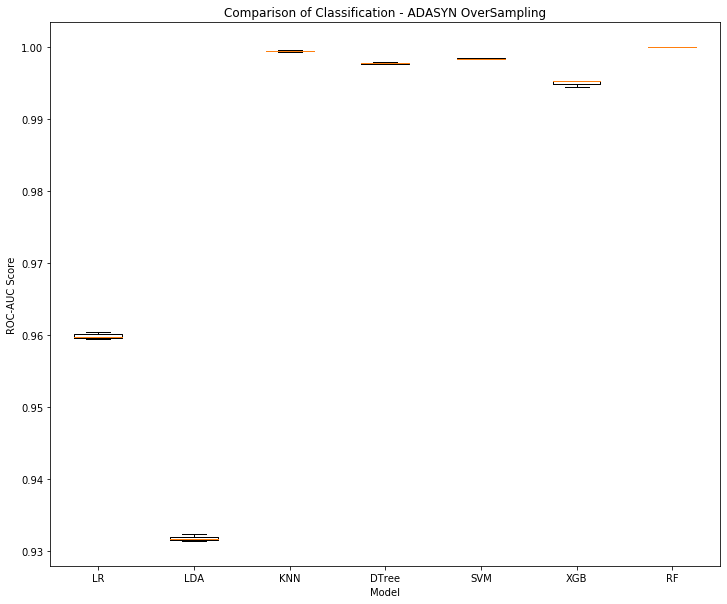

In [53]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification - ADASYN OverSampling')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results_adasyn)
ax = fig.add_subplot(111)
ax.set_xticklabels(names_adasyn)
plt.show()